In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import h5py
import pandas as pd

In [33]:
def generate_parent_table(phenotype_file, trait='number'):
    phenotypes = pd.read_table(phenotype_file)
    pedigree = phenotypes['pedigree'].str.split('_', expand=True)
    pedigree.columns = ['f', 'X', 'm']
    phenotypes = pd.concat([phenotypes, pedigree], axis=1)
    phenotypes['number'] = np.arange(phenotypes.shape[0])
    parent_table = phenotypes.pivot_table(values=trait, index=['m'], columns=['f'], dropna=False)
    male_ids = ['m%d' % i for i in range(1, parent_table.shape[0] + 1)]
    female_ids = ['f%d' % i for i in range(1, parent_table.shape[1] + 1)]
    parent_table = parent_table.loc[male_ids, female_ids]
    return parent_table

In [34]:
parent_table = generate_parent_table('../emaize_data/phenotype/pheno_emaize.txt', trait='number')
parent_table.head()

f,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207
m,,,,,,,,,,,,,,,,,,,,,
m1,0,1,2,3,4,5,6,7,8,9,...,4762,4764,4756,4761,4763,5050,5051,5052,5053,5054
m2,191,192,193,195,196,197,198,199,200,201,...,333,379,4767,4768,4777,5055,5056,5057,5058,5059
m3,380,381,382,384,385,386,387,388,389,390,...,520,569,442,4786,4789,5060,5061,5062,5063,5064
m4,570,571,572,574,575,576,577,578,579,580,...,4797,4802,633,4796,4800,5065,5066,5067,5068,5069
m5,759,760,761,763,764,765,766,767,768,769,...,901,4814,4805,835,4813,5277,5278,5279,5280,5281


In [12]:
f = h5py.File('../data/genotype_2bit/chr1', 'r')
genotypes = f['data'][:10000, :]
f.close()

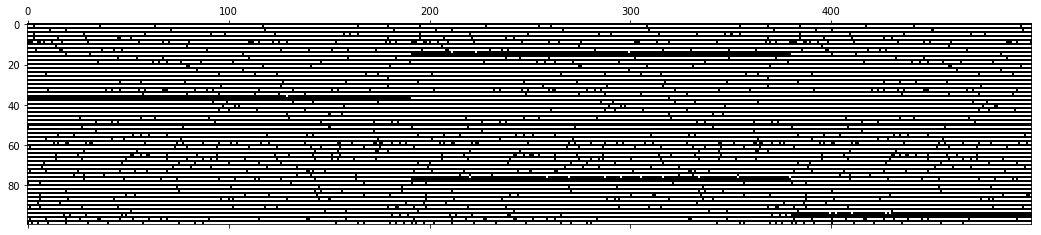

In [48]:
fig, ax = subplots(figsize=(18, 10))
ax.matshow(genotypes[:100, :500], cmap=cm.Greys)

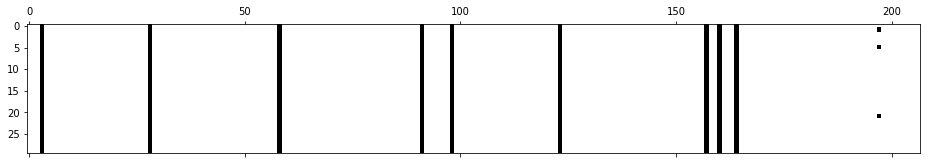

In [145]:
matshow(np.take(genotypes[5], parent_table.values), cmap=cm.Greys)

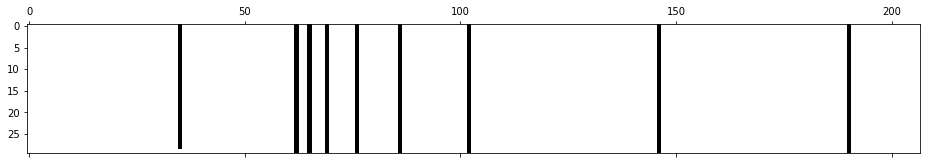

In [38]:
matshow(np.take(genotypes[19], parent_table.values), cmap=cm.Greys)

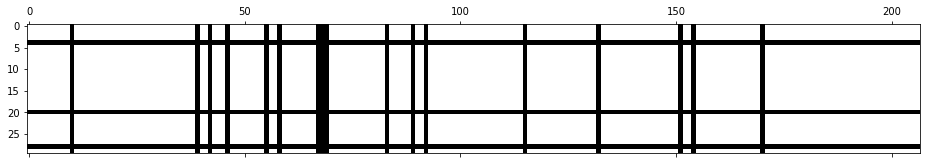

In [171]:
matshow(np.take(genotypes[33], parent_table.values), cmap=cm.Greys)

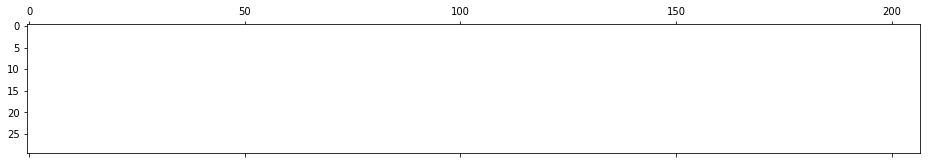

In [51]:
matshow(np.take(genotypes[28], parent_table.values), cmap=cm.Greys)

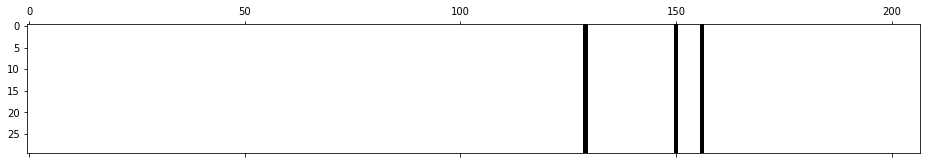

In [65]:
matshow(np.take(genotypes[45], parent_table.values), cmap=cm.Greys)

In [66]:
genotypes.shape

(10000, 6210)

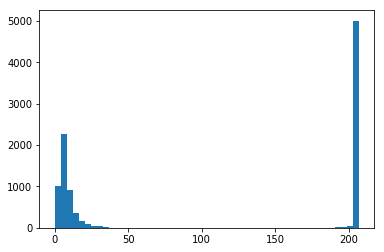

In [77]:
hist(np.take(genotypes, parent_table.values[0], axis=1).sum(axis=1), bins=50)
pass

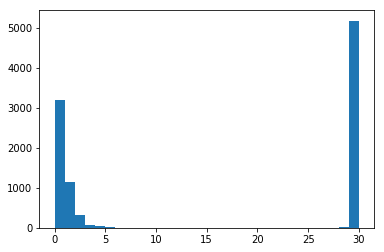

In [86]:
hist(np.take(genotypes, parent_table.values[:, 2], axis=1).sum(axis=1), bins=30)
pass

In [8]:
def read_parent_genotypes(filename):
    f = h5py.File(filename, 'r')
    X_female = f['X_female'][:]
    X_male = f['X_male'][:]
    names_female = f['names_female'][:]
    names_male = f['names_male'][:]
    
    return X_female, X_male, names_female, names_male

In [9]:
X_female, X_male, names_female, names_male = read_parent_genotypes('../output/random_projection/parent_genotype/2bit/normalized_matrix/r=20000')

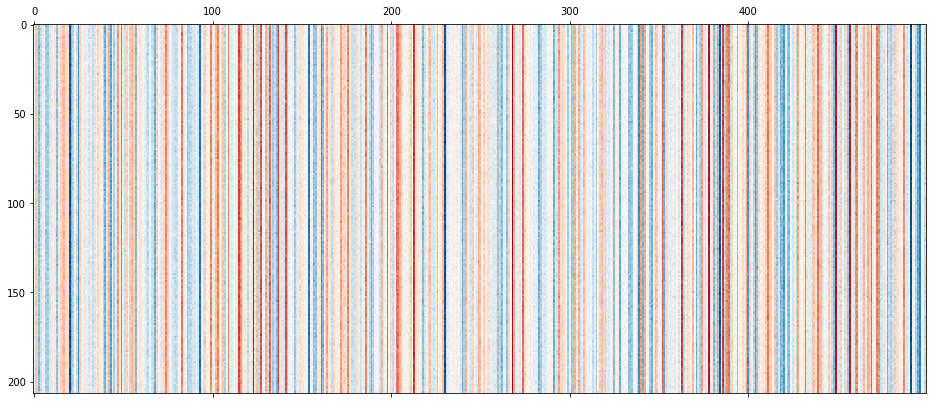

In [10]:
fig, ax = subplots(figsize=(16, 10))
ax.matshow(X_female[:, :500], cmap=cm.RdBu)

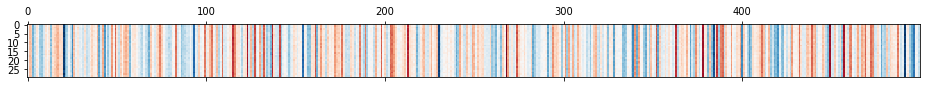

In [108]:
fig, ax = subplots(figsize=(16, 10))
ax.matshow(X_male[:, :500], cmap=cm.RdBu)

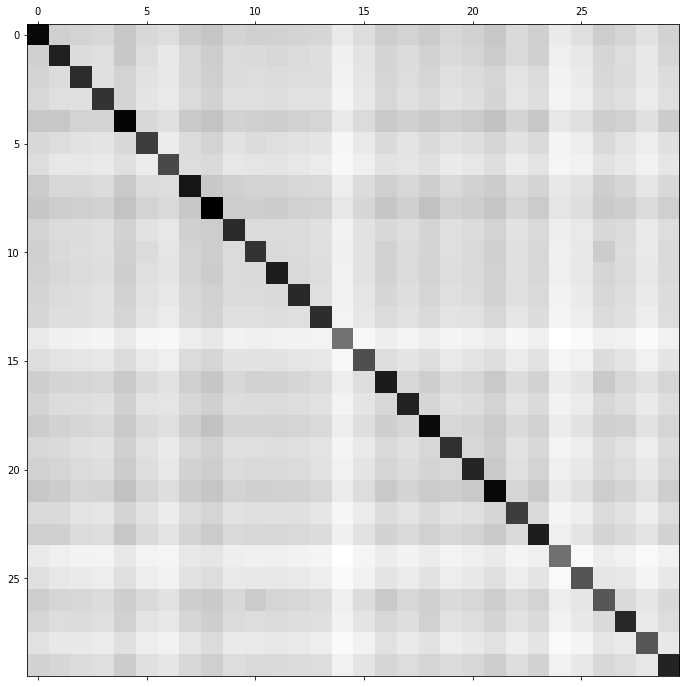

In [132]:
fig, ax = subplots(figsize=(12, 12))
gram = np.dot(X_male, X_male.T)
ax.matshow(np.abs(gram), cmap=cm.Greys)

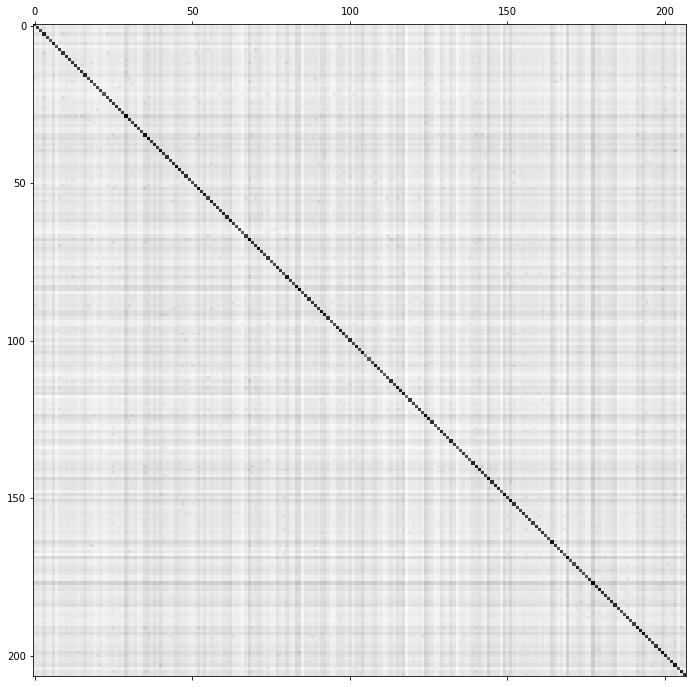

In [129]:
fig, ax = subplots(figsize=(12, 12))
gram = np.dot(X_female, X_female.T)
ax.matshow(np.abs(gram), cmap=cm.Greys)

In [130]:
X_male[:, 0]

array([ 0.2692471 , -0.02251565, -0.1197699 ,  0.6582641 ,  0.56100985,
        0.36650135, -0.02251565,  0.6582641 ,  0.2692471 ,  0.4637556 ,
        0.2692471 ,  0.8527726 , -0.1197699 ,  0.6582641 ,  0.56100985,
        0.36650135, -0.02251565,  0.6582641 ,  1.0472811 , -0.1197699 ,
       -0.02251565,  0.8527726 ,  0.0747386 ,  0.56100985,  0.75551835,
        0.4637556 ,  0.36650135,  0.4637556 ,  0.17199285,  0.75551835])

In [135]:
f = h5py.File('../output/random_projection/2bit/normalized_matrix/r=20000', 'r')
X = f['X'][:]
f.close()

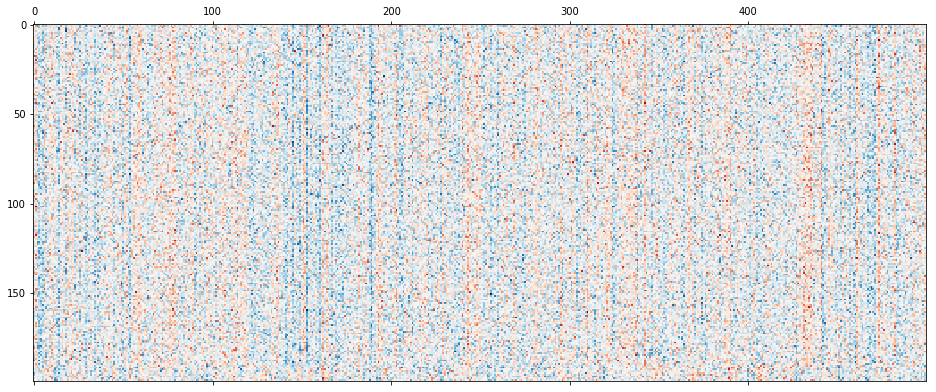

In [139]:
fig, ax = subplots(figsize=(16, 10))
ax.matshow(X[:200, :500], cmap=cm.RdBu)

In [147]:
cov_child_female = np.einsum('ik,jk->ij', X, X_female)

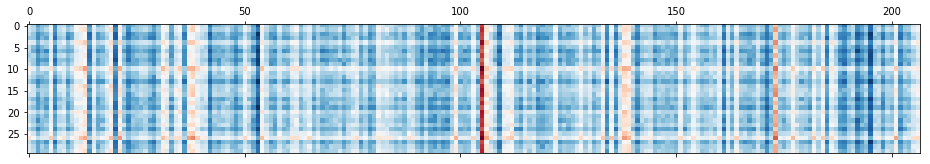

In [160]:
matshow(np.take(cov_child_female[:, 20], parent_table.values), cmap=cm.RdBu)

In [161]:
cov_child_male = np.einsum('ik,jk->ij', X, X_male)

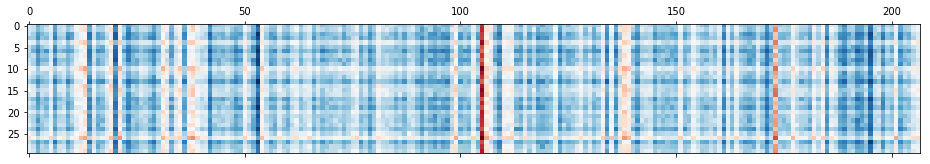

In [164]:
matshow(np.take(cov_child_male[:, 2], parent_table.values), cmap=cm.RdBu)

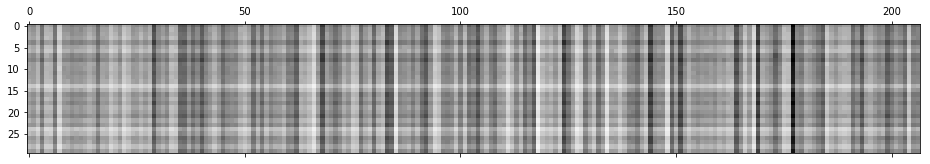

In [166]:
matshow(np.abs(np.einsum('ik,jk->ij', X_male, X_female)), cmap=cm.Greys)

In [167]:
np.einsum('ik,jk->ij', X_male, X_female)

array([[ 377508.78957926,  377619.22240598,  377202.59631665, ...,
         377093.56344581,  377925.01327837,  377858.15395784],
       [ 377311.96937867,  377449.37596803,  377109.80712872, ...,
         376893.6684381 ,  377744.12927781,  377608.63415984],
       [ 377231.76892049,  377367.34958206,  377065.91085888, ...,
         376813.57653199,  377700.83557922,  377617.02065841],
       ..., 
       [ 377214.93722224,  377302.82871922,  377047.23581372, ...,
         376814.24036807,  377619.15663451,  377561.60711606],
       [ 376930.83811318,  377043.5244059 ,  376687.35820863, ...,
         376577.6346853 ,  377336.15568023,  377295.11928016],
       [ 377278.75067222,  377363.53555974,  377033.9236976 , ...,
         376855.6409099 ,  377625.67812223,  377610.99166522]])

In [12]:
parent_table.head()

f,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207
m,,,,,,,,,,,,,,,,,,,,,
m1,0,1,2,3,4,5,6,7,8,9,...,4762,4764,4756,4761,4763,5050,5051,5052,5053,5054
m2,191,192,193,195,196,197,198,199,200,201,...,333,379,4767,4768,4777,5055,5056,5057,5058,5059
m3,380,381,382,384,385,386,387,388,389,390,...,520,569,442,4786,4789,5060,5061,5062,5063,5064
m4,570,571,572,574,575,576,577,578,579,580,...,4797,4802,633,4796,4800,5065,5066,5067,5068,5069
m5,759,760,761,763,764,765,766,767,768,769,...,901,4814,4805,835,4813,5277,5278,5279,5280,5281


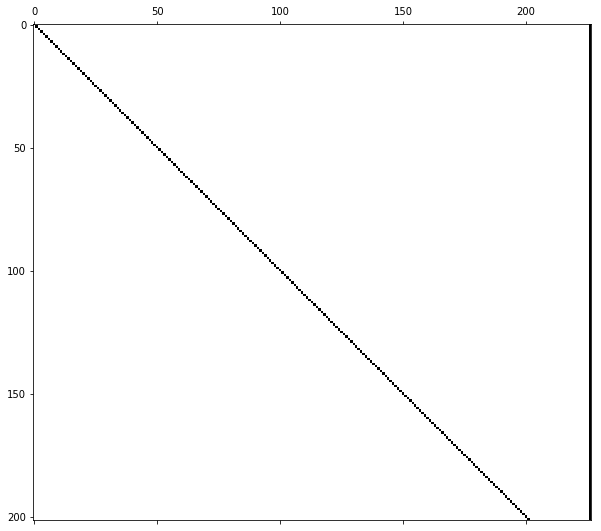

In [29]:
fig, ax = subplots(figsize=(10, 10))
ax.matshow(X[24*n_female:25*n_female], cmap=cm.Greys)

In [30]:
phenotypes = pd.read_table('../emaize_data/phenotype/pheno_emaize.txt')

In [35]:
trait1 = generate_parent_table('../emaize_data/phenotype/pheno_emaize.txt', 'trait1')
trait1.head()

f,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207
m,,,,,,,,,,,,,,,,,,,,,
m1,-1.746103,-1.679248,-2.748920,-2.414647,-1.879812,-2.347793,-2.013521,-2.214084,-1.879812,-1.946666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
m2,0.794366,0.526949,-0.007887,0.058967,-0.208450,-0.475868,0.259531,-0.409014,-0.074742,-0.141596,...,-1.144413,0.058967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
m3,1.997746,3.669108,1.730329,2.198310,2.398873,1.699415,2.933709,2.265164,1.663474,2.465728,...,-0.007887,2.866854,2.398873,NaN,NaN,NaN,NaN,NaN,NaN,NaN
m4,-0.542723,0.593803,-0.943849,-0.542723,-0.342159,-0.676432,0.593803,0.125822,-0.074742,0.259531,...,NaN,NaN,0.994930,NaN,NaN,NaN,NaN,NaN,NaN,NaN
m5,0.326385,0.326385,-0.074742,-0.409014,-0.141596,-0.542723,0.125822,-0.208450,-0.141596,-0.141596,...,-1.612394,NaN,NaN,0.125822,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
nan_mask = np.logical_not(np.isnan(trait1.values[:n_male, :n_female].flatten()))

In [106]:
n_female = 202
n_male = 25
X = np.zeros((n_female*n_male, n_female + n_male))
X[:, :n_female] = np.tile(np.identity(n_female), n_male).T
X[:, n_female:] = np.repeat(np.identity(n_male), n_female, axis=0)
X = X[nan_mask]
#X *= 1 + np.random.uniform(size=X.shape)*0.1
y = trait1.values[:n_male, :n_female].flatten()[nan_mask]

In [108]:
np.dot(X.T, X)

array([[  23.,    0.,    0., ...,    1.,    1.,    1.],
       [   0.,   25.,    0., ...,    1.,    1.,    1.],
       [   0.,    0.,   25., ...,    1.,    1.,    1.],
       ..., 
       [   1.,    1.,    1., ...,  192.,    0.,    0.],
       [   1.,    1.,    1., ...,    0.,  189.,    0.],
       [   1.,    1.,    1., ...,    0.,    0.,  190.]])

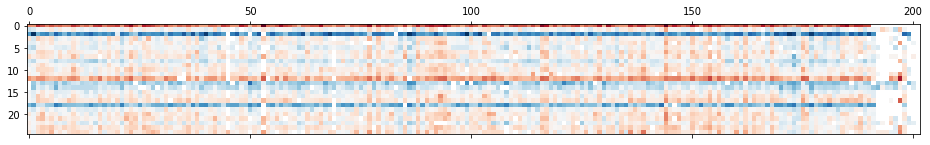

In [46]:
matshow(trait1.values[:n_male, :n_female], cmap=cm.RdBu)

In [47]:
w, b = np.linalg.lstsq?

In [51]:
r = np.linalg.lstsq(X, y.reshape((-1, 1)))

In [56]:
import sklearn

In [57]:
from sklearn.linear_model import LinearRegression

In [74]:
model = LinearRegression()
model.fit(X, y.reshape((-1, 1)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
model.intercept_

array([ 0.1137703])

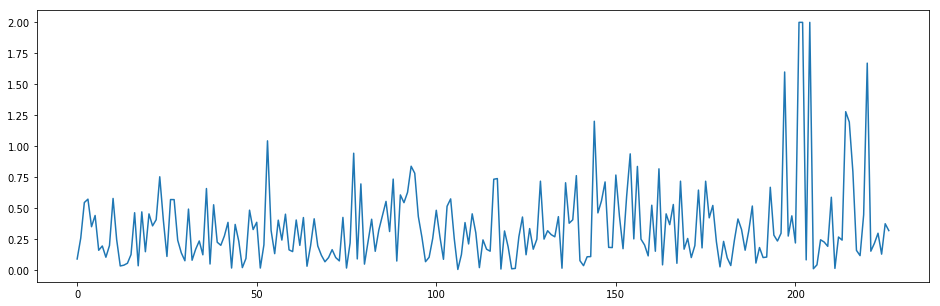

In [95]:
fig, ax = subplots(figsize=(16, 5))
ax.plot(np.abs(np.clip(model.coef_.flatten(), -2, 2)), label='coef_all')

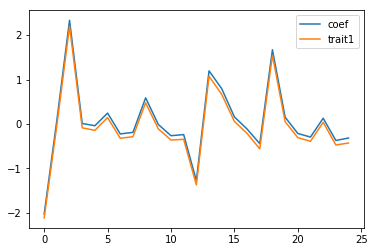

In [87]:
plot(np.clip(model.coef_.flatten()[n_female:], -5, 5), label='coef_male')
plot(np.mean(nan_to_num(trait1.values[:n_male, :n_female]), axis=1), label='trait1_male')
legend()

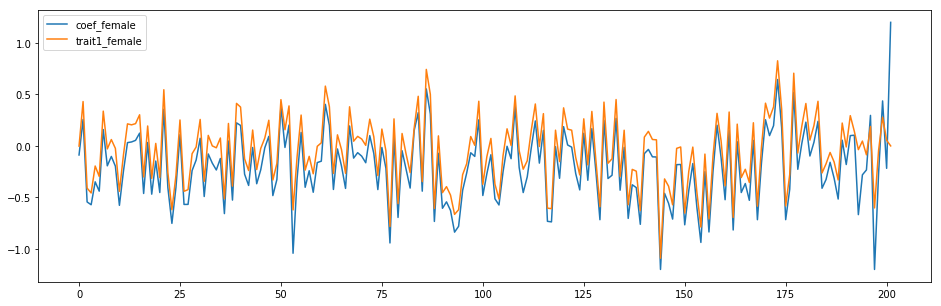

In [92]:
fig, ax = subplots(figsize=(16, 5))
ax.plot(np.clip(model.coef_.flatten()[:n_female], -1.2, 1.2), label='coef_female')
ax.plot(np.mean(nan_to_num(trait1.values[:n_male, :n_female]), axis=0), label='trait1_female')
ax.legend()

In [100]:
y_ = y - model.predict(X).flatten()

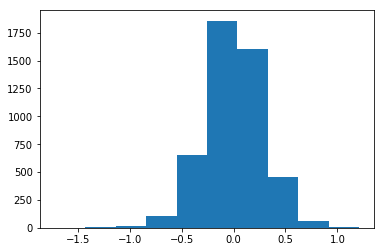

In [103]:
hist(y_, bins=10)
pass

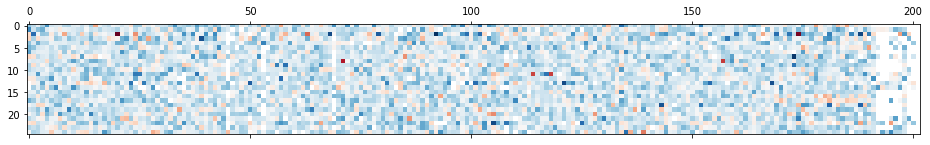

In [104]:
trait1_normalized = np.full(n_male*n_female, np.nan)
trait1_normalized[nan_mask] = y_
trait1_normalized = trait1_normalized.reshape((n_male, n_female))
matshow(trait1_normalized, cmap=cm.RdBu)

In [105]:
X.shape

(4754, 227)